In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


**load dataset**

In [3]:
# Load dataset
dataset_path = '/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv'

columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df = pd.read_csv(dataset_path, encoding='ISO-8859-1', names=columns)

# Selecting only required columns (target and text)
df = df[['target', 'text']]

# Convert target to binary (0: Negative, 1: Positive)
df['target'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

# Split data into train and test sets
X = df['text'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the sentences and pad them to the same length
def tokenize_and_pad(sentences, max_length=100):
    input_ids = [tokenizer.encode(sent, add_special_tokens=True, truncation=True, max_length=max_length) for sent in sentences]
    input_ids = pad_sequences(input_ids, maxlen=max_length, dtype='long', truncating='post', padding='post')
    return input_ids

# Tokenize training and test data
X_train_ids = tokenize_and_pad(X_train)
X_test_ids = tokenize_and_pad(X_test)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [7]:
# Define CNN model
embedding_dim = 128
max_length = 100

model = Sequential([
    Embedding(input_dim=tokenizer.vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Epoch 1/25


I0000 00:00:1729571580.094138     100 service.cc:145] XLA service 0x7f3490006250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729571580.094205     100 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


   61/40000 ━━━━━━━━━━━━━━━━━━━━ 1:42 3ms/step - accuracy: 0.5128 - loss: 0.6935

I0000 00:00:1729571583.182490     100 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40000/40000 ━━━━━━━━━━━━━━━━━━━━ 117s 3ms/step - accuracy: 0.7999 - loss: 0.4310 - val_accuracy: 0.8311 - val_loss: 0.3750
Epoch 2/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.8450 - loss: 0.3558 - val_accuracy: 0.8297 - val_loss: 0.3794
Epoch 3/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.8638 - loss: 0.3190 - val_accuracy: 0.8346 - val_loss: 0.3826
Epoch 4/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.8815 - loss: 0.2831 - val_accuracy: 0.8280 - val_loss: 0.4001
Epoch 5/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.8980 - loss: 0.2480 - val_accuracy: 0.8241 - val_loss: 0.4177
Epoch 6/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.9126 - loss: 0.2150 - val_accuracy: 0.8208 - val_loss: 0.4723
Epoch 7/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.9250 - loss: 0.1872 - val_accuracy: 0.8151 - val_loss: 0.5283
Epoch 8/25
40000/40000 ━━━━━━━━━━━━━━━━━━━━ 112s 3ms/step - accuracy: 0.9

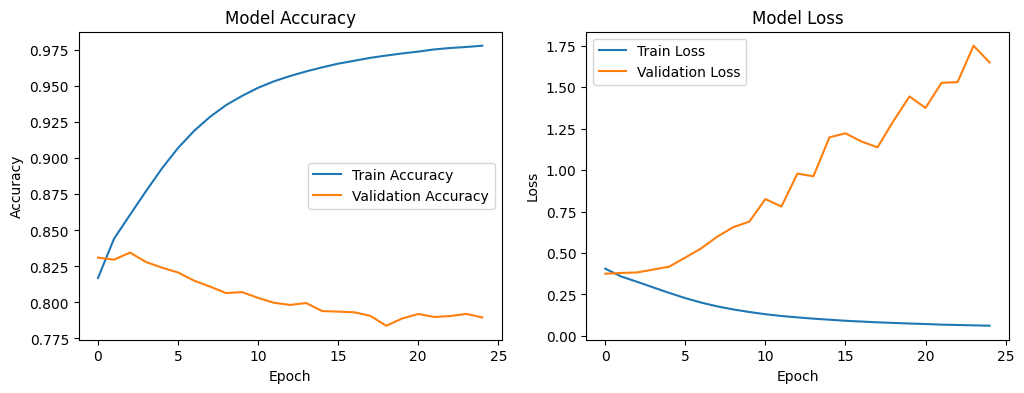

In [8]:
# Train the model
history = model.fit(X_train_ids, y_train, epochs=25, batch_size=32, validation_data=(X_test_ids, y_test))

# Plot training & validation accuracy and loss
def plot_training_history(history):
    # Accuracy plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)


In [9]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Make predictions on the test set
y_pred_probs = model.predict(X_test_ids)  # Model outputs probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary (0 or 1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


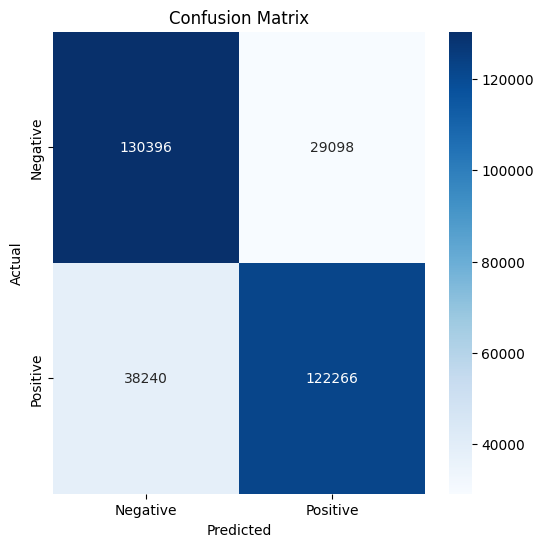

              precision    recall  f1-score   support

    Negative       0.77      0.82      0.79    159494
    Positive       0.81      0.76      0.78    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



In [10]:
# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for additional performance metrics
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


In [13]:
# Save the model to a specified path 
model_save_path = '/kaggle/working/sentiment_analysis_cnn_model.h5'
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /kaggle/working/sentiment_analysis_cnn_model.h5
